In [11]:
def in_ipynb():
    try:
        if str(type(get_ipython())) == "<class 'ipykernel.zmqshell.ZMQInteractiveShell'>":
            return True
        else:
            return False
    except NameError:
        return False

# Determine whether to make the figures inline (for spyder or jupyter)
# vs whatever is the automatic setting that will apply if run from the terminal
if in_ipynb():
    # %matplotlib inline generates a syntax error when run from the shell
    # so do this instead
    get_ipython().run_line_magic('matplotlib', 'inline') 
else:
    get_ipython().run_line_magic('matplotlib', 'auto') 

In [57]:
import scipy.fftpack as sf  # scipy discrete fourier transform
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [58]:
# arbitrarily generate a consumption function at different grid points 
np.random.seed(9001)
c_grids = np.random.randint(0,10,100).reshape([10,10])

In [72]:
# an example with threshold 0.9
c_dct0 = sf.dct(c_grids,axis=0,norm='ortho')
c_dct = sf.dct(c_dct0,axis=1,norm='ortho')
c_dct_rdc = c_dct*(abs(c_dct)>0.9*c_dct.max())
c_approx0 = sf.idct(c_dct_rdc,axis=0,norm='ortho')
c_approx = sf.idct(c_approx0,axis=0,norm='ortho').reshape(10,10)
c_diff =abs(c_approx-c_grids)

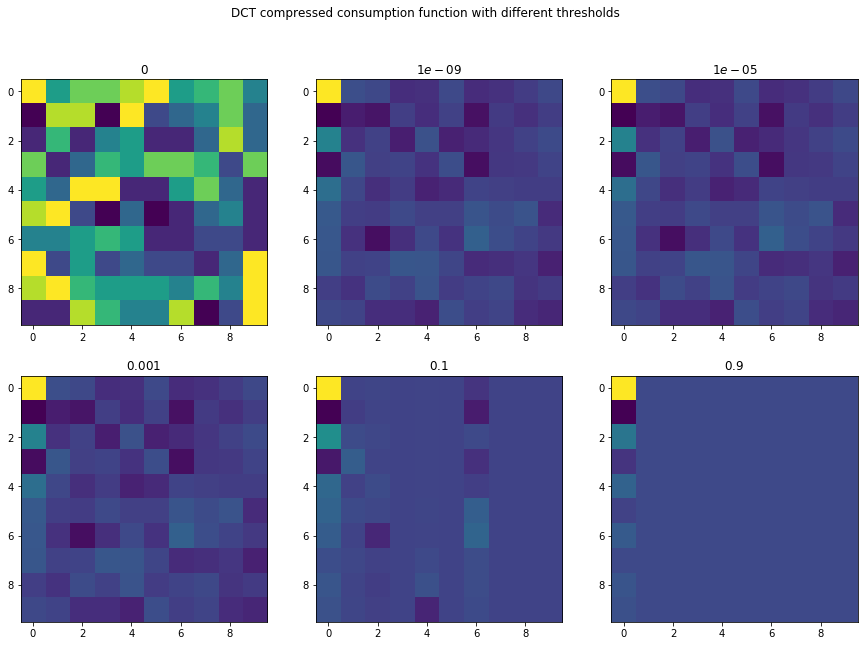

In [74]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('DCT compressed c function with different thresholds')
val_lst = np.array([0.000000001,0.00001,0.001,0.1,0.9])
ax=fig.add_subplot(2,3,1)
ax.imshow(c_grids)
ax.set_title('0')
for i in range(len(val_lst)):
    c_dct_rdc = c_dct*(abs(c_dct)>val_lst[i]*c_dct.max())
    c_approx0 = sf.idct(c_dct_rdc,axis=0,norm='ortho')
    c_approx = sf.idct(c_approx0,axis=0,norm='ortho').reshape(10,10)
    ax = fig.add_subplot(2,3,i+2)
    ax.set_title(r'${}$'.format(val_lst[i]))
    ax.imshow(c_approx)

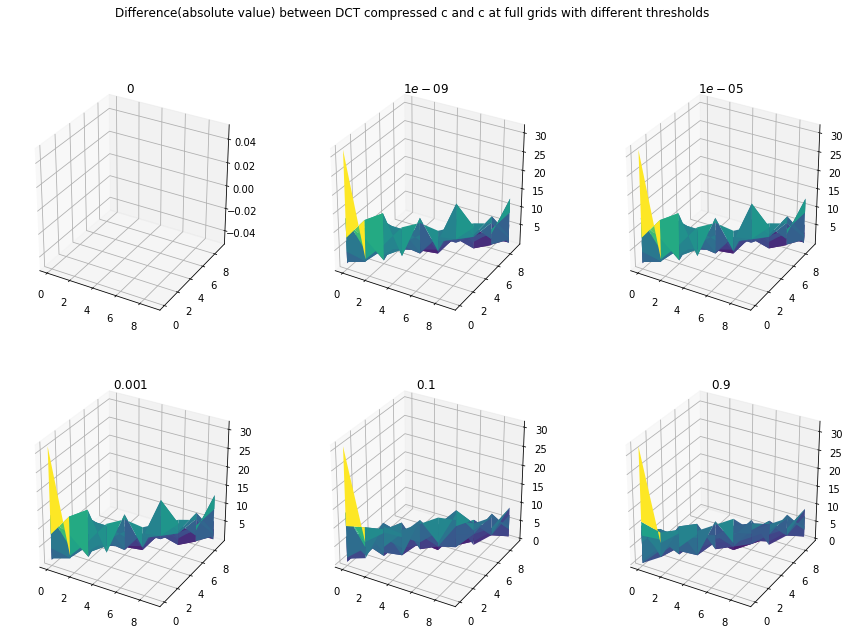

In [82]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Difference(absolute value) between DCT compressed c and c at full grids with different thresholds')
val_lst = np.array([0.000000001,0.00001,0.001,0.1,0.9])
ax=fig.add_subplot(2,3,1,projection='3d')
ax.plot_surface(range(c_diff.shape[0]),range(c_diff.shape[1]),c_grids-c_grids)
ax.set_title('0')
for i in range(len(val_lst)):
    c_dct_rdc = c_dct*(abs(c_dct)>val_lst[i]*c_dct.max())
    c_approx0 = sf.idct(c_dct_rdc,axis=0,norm='ortho')
    c_approx = sf.idct(c_approx0,axis=0,norm='ortho').reshape(10,10)
    c_diff = abs(c_approx -c_grids)
    ax = fig.add_subplot(2,3,i+2,projection='3d')
    ax.set_title(r'${}$'.format(val_lst[i]))
    ax.plot_surface(range(c_diff.shape[0]),range(c_diff.shape[1]),c_diff,rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')